## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0  94.807388   341.326937  0.153479  10.496675  0.557509
1  99.437454  1420.389506  0.873229   1.131477  1.516236
2  29.032776  1558.852142  0.157378   7.313185  1.454295
3  42.746958  1410.863011  0.526992   9.794672  1.634974
4  78.012548   907.416013  0.805511  10.949800  1.402613


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.02),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 0.93888 | train_mse: 5.67    | train_mae: 1.83005 |  0:00:00s
epoch 1  | loss: 0.80989 | train_mse: 6.97531 | train_mae: 1.89631 |  0:00:00s


epoch 2  | loss: 0.55629 | train_mse: 4.6041  | train_mae: 1.6624  |  0:00:00s


epoch 3  | loss: 0.48346 | train_mse: 2.43092 | train_mae: 1.20341 |  0:00:00s
epoch 4  | loss: 0.33989 | train_mse: 2.49489 | train_mae: 1.19836 |  0:00:00s
epoch 5  | loss: 0.30215 | train_mse: 1.82572 | train_mae: 0.98747 |  0:00:00s


epoch 6  | loss: 0.33038 | train_mse: 1.67491 | train_mae: 0.90946 |  0:00:01s
epoch 7  | loss: 0.42172 | train_mse: 1.61987 | train_mae: 0.87555 |  0:00:01s
epoch 8  | loss: 0.26071 | train_mse: 1.12782 | train_mae: 0.75784 |  0:00:01s


epoch 9  | loss: 0.30228 | train_mse: 1.58271 | train_mae: 0.83533 |  0:00:01s
epoch 10 | loss: 0.31568 | train_mse: 1.54769 | train_mae: 0.79376 |  0:00:01s
epoch 11 | loss: 0.35655 | train_mse: 1.66955 | train_mae: 0.82773 |  0:00:01s


epoch 12 | loss: 0.19416 | train_mse: 1.58391 | train_mae: 0.82653 |  0:00:01s
epoch 13 | loss: 0.21082 | train_mse: 1.07144 | train_mae: 0.70265 |  0:00:01s
epoch 14 | loss: 0.2192  | train_mse: 0.99076 | train_mae: 0.69168 |  0:00:01s


epoch 15 | loss: 0.17543 | train_mse: 1.03579 | train_mae: 0.69352 |  0:00:01s
epoch 16 | loss: 0.15018 | train_mse: 0.96917 | train_mae: 0.65484 |  0:00:01s
epoch 17 | loss: 0.30951 | train_mse: 0.76094 | train_mae: 0.57681 |  0:00:01s


epoch 18 | loss: 0.14641 | train_mse: 0.49163 | train_mae: 0.49169 |  0:00:02s
epoch 19 | loss: 0.1543  | train_mse: 0.49951 | train_mae: 0.4975  |  0:00:02s
epoch 20 | loss: 0.17474 | train_mse: 0.39537 | train_mae: 0.44979 |  0:00:02s


epoch 21 | loss: 0.18559 | train_mse: 0.35635 | train_mae: 0.42458 |  0:00:02s
epoch 22 | loss: 0.22995 | train_mse: 0.29324 | train_mae: 0.38897 |  0:00:02s


epoch 23 | loss: 0.25126 | train_mse: 0.26275 | train_mae: 0.36907 |  0:00:02s
epoch 24 | loss: 0.33202 | train_mse: 0.2645  | train_mae: 0.37651 |  0:00:02s
epoch 25 | loss: 0.21514 | train_mse: 0.28835 | train_mae: 0.39103 |  0:00:02s


epoch 26 | loss: 0.19296 | train_mse: 0.33415 | train_mae: 0.42226 |  0:00:02s
epoch 27 | loss: 0.20143 | train_mse: 0.2876  | train_mae: 0.39741 |  0:00:02s
epoch 28 | loss: 0.17335 | train_mse: 0.25094 | train_mae: 0.37103 |  0:00:02s


epoch 29 | loss: 0.15529 | train_mse: 0.26237 | train_mae: 0.37536 |  0:00:03s
epoch 30 | loss: 0.17663 | train_mse: 0.23827 | train_mae: 0.34738 |  0:00:03s
epoch 31 | loss: 0.17812 | train_mse: 0.17212 | train_mae: 0.284   |  0:00:03s


epoch 32 | loss: 0.18229 | train_mse: 0.16642 | train_mae: 0.29301 |  0:00:03s
epoch 33 | loss: 0.24194 | train_mse: 0.18324 | train_mae: 0.31782 |  0:00:03s
epoch 34 | loss: 0.2297  | train_mse: 0.20176 | train_mae: 0.33948 |  0:00:03s


epoch 35 | loss: 0.18685 | train_mse: 0.19093 | train_mae: 0.31975 |  0:00:03s
epoch 36 | loss: 0.20073 | train_mse: 0.184   | train_mae: 0.30719 |  0:00:03s
epoch 37 | loss: 0.23408 | train_mse: 0.15785 | train_mae: 0.29149 |  0:00:03s


epoch 38 | loss: 0.21072 | train_mse: 0.1467  | train_mae: 0.27738 |  0:00:03s
epoch 39 | loss: 0.18258 | train_mse: 0.17846 | train_mae: 0.30176 |  0:00:03s
epoch 40 | loss: 0.15545 | train_mse: 0.19644 | train_mae: 0.31745 |  0:00:03s


epoch 41 | loss: 0.14116 | train_mse: 0.21667 | train_mae: 0.33303 |  0:00:04s
epoch 42 | loss: 0.28911 | train_mse: 0.27239 | train_mae: 0.36261 |  0:00:04s
epoch 43 | loss: 0.1476  | train_mse: 0.17902 | train_mae: 0.30225 |  0:00:04s


epoch 44 | loss: 0.23191 | train_mse: 0.10579 | train_mae: 0.23881 |  0:00:04s
epoch 45 | loss: 0.18366 | train_mse: 0.09199 | train_mae: 0.22607 |  0:00:04s
epoch 46 | loss: 0.16329 | train_mse: 0.11287 | train_mae: 0.25281 |  0:00:04s


epoch 47 | loss: 0.32667 | train_mse: 0.13132 | train_mae: 0.27083 |  0:00:04s
epoch 48 | loss: 0.12057 | train_mse: 0.12149 | train_mae: 0.26619 |  0:00:04s
epoch 49 | loss: 0.21979 | train_mse: 0.1119  | train_mae: 0.25922 |  0:00:04s


epoch 50 | loss: 0.08753 | train_mse: 0.09259 | train_mae: 0.24418 |  0:00:04s
epoch 51 | loss: 0.14362 | train_mse: 0.08434 | train_mae: 0.23216 |  0:00:04s
epoch 52 | loss: 0.20444 | train_mse: 0.08953 | train_mae: 0.23313 |  0:00:05s


epoch 53 | loss: 0.14709 | train_mse: 0.09194 | train_mae: 0.2328  |  0:00:05s
epoch 54 | loss: 0.20026 | train_mse: 0.09665 | train_mae: 0.23811 |  0:00:05s
epoch 55 | loss: 0.11166 | train_mse: 0.08963 | train_mae: 0.23666 |  0:00:05s


epoch 56 | loss: 0.16217 | train_mse: 0.08253 | train_mae: 0.21809 |  0:00:05s
epoch 57 | loss: 0.29569 | train_mse: 0.07261 | train_mae: 0.21168 |  0:00:05s
epoch 58 | loss: 0.16483 | train_mse: 0.07695 | train_mae: 0.21518 |  0:00:05s


epoch 59 | loss: 0.13196 | train_mse: 0.07435 | train_mae: 0.21944 |  0:00:05s
epoch 60 | loss: 0.09328 | train_mse: 0.08321 | train_mae: 0.22179 |  0:00:05s
epoch 61 | loss: 0.13037 | train_mse: 0.10355 | train_mae: 0.23938 |  0:00:05s


epoch 62 | loss: 0.19433 | train_mse: 0.12357 | train_mae: 0.24997 |  0:00:05s
epoch 63 | loss: 0.18402 | train_mse: 0.12109 | train_mae: 0.24596 |  0:00:05s
epoch 64 | loss: 0.13617 | train_mse: 0.11598 | train_mae: 0.24116 |  0:00:06s


epoch 65 | loss: 0.24107 | train_mse: 0.11254 | train_mae: 0.2431  |  0:00:06s
epoch 66 | loss: 0.19224 | train_mse: 0.11449 | train_mae: 0.24903 |  0:00:06s
epoch 67 | loss: 0.12846 | train_mse: 0.10687 | train_mae: 0.23607 |  0:00:06s


epoch 68 | loss: 0.19986 | train_mse: 0.11075 | train_mae: 0.23798 |  0:00:06s
epoch 69 | loss: 0.1574  | train_mse: 0.10371 | train_mae: 0.24092 |  0:00:06s
epoch 70 | loss: 0.14061 | train_mse: 0.09825 | train_mae: 0.22962 |  0:00:06s


epoch 71 | loss: 0.30645 | train_mse: 0.11348 | train_mae: 0.25517 |  0:00:06s
epoch 72 | loss: 0.10584 | train_mse: 0.09335 | train_mae: 0.24342 |  0:00:06s
epoch 73 | loss: 0.20536 | train_mse: 0.09813 | train_mae: 0.24904 |  0:00:06s


epoch 74 | loss: 0.22718 | train_mse: 0.09546 | train_mae: 0.24009 |  0:00:06s
epoch 75 | loss: 0.15083 | train_mse: 0.11139 | train_mae: 0.24649 |  0:00:06s
epoch 76 | loss: 0.11207 | train_mse: 0.16155 | train_mae: 0.26139 |  0:00:07s


epoch 77 | loss: 0.17738 | train_mse: 0.11502 | train_mae: 0.25353 |  0:00:07s
epoch 78 | loss: 0.21279 | train_mse: 0.09305 | train_mae: 0.23933 |  0:00:07s


epoch 79 | loss: 0.11082 | train_mse: 0.08666 | train_mae: 0.22464 |  0:00:07s
epoch 80 | loss: 0.1678  | train_mse: 0.08143 | train_mae: 0.21274 |  0:00:07s


epoch 81 | loss: 0.08201 | train_mse: 0.08414 | train_mae: 0.2162  |  0:00:07s
epoch 82 | loss: 0.11507 | train_mse: 0.07727 | train_mae: 0.21358 |  0:00:07s


epoch 83 | loss: 0.13326 | train_mse: 0.08702 | train_mae: 0.20312 |  0:00:07s
epoch 84 | loss: 0.11884 | train_mse: 0.10031 | train_mae: 0.21549 |  0:00:07s


epoch 85 | loss: 0.13181 | train_mse: 0.10582 | train_mae: 0.22303 |  0:00:08s
epoch 86 | loss: 0.11274 | train_mse: 0.09502 | train_mae: 0.21374 |  0:00:08s
epoch 87 | loss: 0.09781 | train_mse: 0.09968 | train_mae: 0.22485 |  0:00:08s


epoch 88 | loss: 0.19023 | train_mse: 0.11134 | train_mae: 0.24274 |  0:00:08s
epoch 89 | loss: 0.1032  | train_mse: 0.11977 | train_mae: 0.24889 |  0:00:08s
epoch 90 | loss: 0.21089 | train_mse: 0.13381 | train_mae: 0.25708 |  0:00:08s


epoch 91 | loss: 0.14568 | train_mse: 0.17222 | train_mae: 0.27883 |  0:00:08s
epoch 92 | loss: 0.16741 | train_mse: 0.21503 | train_mae: 0.30756 |  0:00:08s
epoch 93 | loss: 0.13738 | train_mse: 0.19899 | train_mae: 0.30175 |  0:00:08s


epoch 94 | loss: 0.11355 | train_mse: 0.14733 | train_mae: 0.27167 |  0:00:08s
epoch 95 | loss: 0.08912 | train_mse: 0.11764 | train_mae: 0.25085 |  0:00:08s
epoch 96 | loss: 0.19331 | train_mse: 0.10504 | train_mae: 0.24424 |  0:00:08s


epoch 97 | loss: 0.13942 | train_mse: 0.08934 | train_mae: 0.23379 |  0:00:09s
epoch 98 | loss: 0.11668 | train_mse: 0.08851 | train_mae: 0.23075 |  0:00:09s
epoch 99 | loss: 0.12973 | train_mse: 0.10706 | train_mae: 0.24534 |  0:00:09s


epoch 100| loss: 0.09036 | train_mse: 0.12286 | train_mae: 0.26185 |  0:00:09s
epoch 101| loss: 0.12026 | train_mse: 0.10296 | train_mae: 0.24259 |  0:00:09s
epoch 102| loss: 0.26212 | train_mse: 0.07346 | train_mae: 0.20609 |  0:00:09s


epoch 103| loss: 0.12666 | train_mse: 0.06211 | train_mae: 0.19638 |  0:00:09s
epoch 104| loss: 0.14012 | train_mse: 0.06212 | train_mae: 0.19223 |  0:00:09s
epoch 105| loss: 0.12392 | train_mse: 0.06066 | train_mae: 0.19296 |  0:00:09s


epoch 106| loss: 0.12927 | train_mse: 0.09277 | train_mae: 0.23162 |  0:00:09s
epoch 107| loss: 0.10756 | train_mse: 0.16902 | train_mae: 0.29237 |  0:00:10s
epoch 108| loss: 0.20339 | train_mse: 0.15954 | train_mae: 0.28791 |  0:00:10s


epoch 109| loss: 0.14823 | train_mse: 0.10519 | train_mae: 0.25115 |  0:00:10s
epoch 110| loss: 0.09369 | train_mse: 0.07372 | train_mae: 0.21201 |  0:00:10s
epoch 111| loss: 0.223   | train_mse: 0.07911 | train_mae: 0.22235 |  0:00:10s


epoch 112| loss: 0.13979 | train_mse: 0.10174 | train_mae: 0.24196 |  0:00:10s
epoch 113| loss: 0.09944 | train_mse: 0.10517 | train_mae: 0.24615 |  0:00:10s
epoch 114| loss: 0.0951  | train_mse: 0.10872 | train_mae: 0.25514 |  0:00:10s


epoch 115| loss: 0.11546 | train_mse: 0.09737 | train_mae: 0.25037 |  0:00:10s
epoch 116| loss: 0.21952 | train_mse: 0.12455 | train_mae: 0.2632  |  0:00:10s
epoch 117| loss: 0.09396 | train_mse: 0.16721 | train_mae: 0.28106 |  0:00:10s


epoch 118| loss: 0.10786 | train_mse: 0.14557 | train_mae: 0.25826 |  0:00:10s
epoch 119| loss: 0.0982  | train_mse: 0.09581 | train_mae: 0.22375 |  0:00:11s


epoch 120| loss: 0.08715 | train_mse: 0.06708 | train_mae: 0.1985  |  0:00:11s
epoch 121| loss: 0.14284 | train_mse: 0.06864 | train_mae: 0.20256 |  0:00:11s


epoch 122| loss: 0.14976 | train_mse: 0.08248 | train_mae: 0.22174 |  0:00:11s
epoch 123| loss: 0.07332 | train_mse: 0.06453 | train_mae: 0.20499 |  0:00:11s
epoch 124| loss: 0.09164 | train_mse: 0.06501 | train_mae: 0.19818 |  0:00:11s


epoch 125| loss: 0.10367 | train_mse: 0.07109 | train_mae: 0.20466 |  0:00:11s
epoch 126| loss: 0.09338 | train_mse: 0.07605 | train_mae: 0.20475 |  0:00:11s
epoch 127| loss: 0.0979  | train_mse: 0.07829 | train_mae: 0.2014  |  0:00:11s


epoch 128| loss: 0.23847 | train_mse: 0.09062 | train_mae: 0.21717 |  0:00:12s
epoch 129| loss: 0.10757 | train_mse: 0.11091 | train_mae: 0.24358 |  0:00:12s
epoch 130| loss: 0.17178 | train_mse: 0.2516  | train_mae: 0.28504 |  0:00:12s


epoch 131| loss: 0.18409 | train_mse: 0.23686 | train_mae: 0.28493 |  0:00:12s
epoch 132| loss: 0.19584 | train_mse: 0.2006  | train_mae: 0.26661 |  0:00:12s
epoch 133| loss: 0.1985  | train_mse: 0.17797 | train_mae: 0.25447 |  0:00:12s


epoch 134| loss: 0.11486 | train_mse: 0.19163 | train_mae: 0.27133 |  0:00:12s
epoch 135| loss: 0.17169 | train_mse: 0.1272  | train_mae: 0.26475 |  0:00:12s
epoch 136| loss: 0.17186 | train_mse: 0.13453 | train_mae: 0.26751 |  0:00:12s


epoch 137| loss: 0.23608 | train_mse: 0.1072  | train_mae: 0.248   |  0:00:12s
epoch 138| loss: 0.10851 | train_mse: 0.11658 | train_mae: 0.25375 |  0:00:12s


epoch 139| loss: 0.14912 | train_mse: 0.16235 | train_mae: 0.27611 |  0:00:13s
epoch 140| loss: 0.1429  | train_mse: 0.16032 | train_mae: 0.27001 |  0:00:13s
epoch 141| loss: 0.22132 | train_mse: 0.17795 | train_mae: 0.28045 |  0:00:13s


epoch 142| loss: 0.12404 | train_mse: 0.15039 | train_mae: 0.2552  |  0:00:13s
epoch 143| loss: 0.11004 | train_mse: 0.13697 | train_mae: 0.24421 |  0:00:13s
epoch 144| loss: 0.09838 | train_mse: 0.12332 | train_mae: 0.24256 |  0:00:13s


epoch 145| loss: 0.113   | train_mse: 0.08671 | train_mae: 0.21335 |  0:00:13s
epoch 146| loss: 0.11716 | train_mse: 0.08233 | train_mae: 0.2076  |  0:00:13s
epoch 147| loss: 0.10572 | train_mse: 0.07403 | train_mae: 0.20524 |  0:00:13s


epoch 148| loss: 0.1406  | train_mse: 0.06897 | train_mae: 0.20095 |  0:00:13s
epoch 149| loss: 0.11557 | train_mse: 0.06965 | train_mae: 0.20427 |  0:00:13s
epoch 150| loss: 0.10978 | train_mse: 0.07406 | train_mae: 0.20472 |  0:00:14s


epoch 151| loss: 0.08522 | train_mse: 0.06821 | train_mae: 0.19875 |  0:00:14s
epoch 152| loss: 0.1422  | train_mse: 0.06045 | train_mae: 0.18857 |  0:00:14s
epoch 153| loss: 0.19572 | train_mse: 0.06301 | train_mae: 0.1939  |  0:00:14s


epoch 154| loss: 0.10613 | train_mse: 0.06657 | train_mae: 0.19832 |  0:00:14s
epoch 155| loss: 0.15708 | train_mse: 0.06432 | train_mae: 0.1952  |  0:00:14s
epoch 156| loss: 0.25262 | train_mse: 0.0895  | train_mae: 0.19936 |  0:00:14s


epoch 157| loss: 0.14737 | train_mse: 0.07698 | train_mae: 0.20619 |  0:00:14s
epoch 158| loss: 0.15012 | train_mse: 0.06701 | train_mae: 0.20461 |  0:00:14s
epoch 159| loss: 0.13715 | train_mse: 0.06204 | train_mae: 0.19608 |  0:00:14s


epoch 160| loss: 0.13469 | train_mse: 0.06092 | train_mae: 0.19405 |  0:00:14s
epoch 161| loss: 0.0841  | train_mse: 0.06376 | train_mae: 0.20065 |  0:00:15s
epoch 162| loss: 0.09258 | train_mse: 0.06508 | train_mae: 0.2008  |  0:00:15s


epoch 163| loss: 0.12336 | train_mse: 0.0607  | train_mae: 0.19622 |  0:00:15s
epoch 164| loss: 0.12112 | train_mse: 0.05838 | train_mae: 0.19784 |  0:00:15s
epoch 165| loss: 0.07564 | train_mse: 0.05962 | train_mae: 0.19396 |  0:00:15s


epoch 166| loss: 0.15647 | train_mse: 0.05788 | train_mae: 0.18856 |  0:00:15s
epoch 167| loss: 0.13867 | train_mse: 0.05417 | train_mae: 0.18417 |  0:00:15s
epoch 168| loss: 0.11755 | train_mse: 0.05472 | train_mae: 0.18244 |  0:00:15s


epoch 169| loss: 0.07571 | train_mse: 0.05977 | train_mae: 0.18727 |  0:00:15s
epoch 170| loss: 0.10811 | train_mse: 0.0638  | train_mae: 0.19493 |  0:00:15s
epoch 171| loss: 0.18272 | train_mse: 0.06639 | train_mae: 0.20344 |  0:00:15s


epoch 172| loss: 0.20009 | train_mse: 0.0713  | train_mae: 0.20478 |  0:00:15s
epoch 173| loss: 0.15878 | train_mse: 0.09155 | train_mae: 0.21869 |  0:00:16s
epoch 174| loss: 0.10178 | train_mse: 0.07921 | train_mae: 0.20628 |  0:00:16s


epoch 175| loss: 0.12982 | train_mse: 0.07542 | train_mae: 0.20396 |  0:00:16s
epoch 176| loss: 0.09185 | train_mse: 0.0723  | train_mae: 0.20015 |  0:00:16s
epoch 177| loss: 0.18488 | train_mse: 0.07639 | train_mae: 0.21385 |  0:00:16s


epoch 178| loss: 0.08637 | train_mse: 0.10576 | train_mae: 0.24267 |  0:00:16s
epoch 179| loss: 0.08792 | train_mse: 0.14345 | train_mae: 0.27069 |  0:00:16s
epoch 180| loss: 0.17507 | train_mse: 0.1648  | train_mae: 0.28504 |  0:00:16s


epoch 181| loss: 0.0755  | train_mse: 0.19181 | train_mae: 0.29702 |  0:00:16s
epoch 182| loss: 0.10205 | train_mse: 0.19514 | train_mae: 0.29873 |  0:00:16s
epoch 183| loss: 0.12477 | train_mse: 0.19639 | train_mae: 0.30452 |  0:00:16s


epoch 184| loss: 0.08824 | train_mse: 0.21073 | train_mae: 0.31299 |  0:00:17s
epoch 185| loss: 0.08703 | train_mse: 0.19679 | train_mae: 0.30031 |  0:00:17s
epoch 186| loss: 0.11993 | train_mse: 0.21605 | train_mae: 0.31241 |  0:00:17s


epoch 187| loss: 0.0877  | train_mse: 0.21333 | train_mae: 0.30836 |  0:00:17s
epoch 188| loss: 0.17225 | train_mse: 0.20771 | train_mae: 0.30491 |  0:00:17s
epoch 189| loss: 0.11429 | train_mse: 0.24316 | train_mae: 0.3235  |  0:00:17s


epoch 190| loss: 0.12036 | train_mse: 0.19481 | train_mae: 0.29045 |  0:00:17s
epoch 191| loss: 0.1447  | train_mse: 0.17496 | train_mae: 0.27552 |  0:00:17s
epoch 192| loss: 0.09536 | train_mse: 0.19156 | train_mae: 0.28587 |  0:00:17s


epoch 193| loss: 0.10187 | train_mse: 0.19369 | train_mae: 0.29266 |  0:00:17s
epoch 194| loss: 0.10938 | train_mse: 0.18858 | train_mae: 0.29497 |  0:00:17s
epoch 195| loss: 0.07465 | train_mse: 0.21205 | train_mae: 0.30867 |  0:00:17s


epoch 196| loss: 0.14105 | train_mse: 0.1938  | train_mae: 0.29861 |  0:00:18s
epoch 197| loss: 0.11244 | train_mse: 0.11655 | train_mae: 0.25251 |  0:00:18s
epoch 198| loss: 0.10314 | train_mse: 0.08208 | train_mae: 0.22148 |  0:00:18s


epoch 199| loss: 0.20244 | train_mse: 0.08434 | train_mae: 0.22151 |  0:00:18s
epoch 200| loss: 0.15427 | train_mse: 0.08218 | train_mae: 0.21668 |  0:00:18s
epoch 201| loss: 0.0959  | train_mse: 0.08056 | train_mae: 0.22597 |  0:00:18s


epoch 202| loss: 0.09696 | train_mse: 0.08536 | train_mae: 0.23491 |  0:00:18s
epoch 203| loss: 0.09581 | train_mse: 0.0812  | train_mae: 0.22626 |  0:00:18s
epoch 204| loss: 0.07839 | train_mse: 0.07705 | train_mae: 0.21293 |  0:00:18s


epoch 205| loss: 0.06952 | train_mse: 0.08996 | train_mae: 0.21838 |  0:00:18s


epoch 206| loss: 0.16483 | train_mse: 0.1117  | train_mae: 0.23054 |  0:00:19s
epoch 207| loss: 0.08793 | train_mse: 0.08979 | train_mae: 0.21769 |  0:00:19s
epoch 208| loss: 0.08715 | train_mse: 0.06409 | train_mae: 0.19545 |  0:00:19s


epoch 209| loss: 0.12375 | train_mse: 0.0559  | train_mae: 0.18345 |  0:00:19s
epoch 210| loss: 0.08879 | train_mse: 0.05461 | train_mae: 0.18221 |  0:00:19s
epoch 211| loss: 0.0753  | train_mse: 0.06998 | train_mae: 0.20385 |  0:00:19s


epoch 212| loss: 0.0908  | train_mse: 0.07343 | train_mae: 0.20443 |  0:00:19s
epoch 213| loss: 0.10357 | train_mse: 0.09612 | train_mae: 0.22687 |  0:00:19s
epoch 214| loss: 0.07947 | train_mse: 0.08543 | train_mae: 0.22489 |  0:00:19s


epoch 215| loss: 0.11803 | train_mse: 0.06632 | train_mae: 0.20203 |  0:00:19s
epoch 216| loss: 0.17032 | train_mse: 0.06322 | train_mae: 0.19313 |  0:00:19s
epoch 217| loss: 0.06064 | train_mse: 0.06577 | train_mae: 0.18904 |  0:00:19s


epoch 218| loss: 0.0692  | train_mse: 0.06649 | train_mae: 0.1888  |  0:00:20s
epoch 219| loss: 0.09243 | train_mse: 0.07533 | train_mae: 0.19805 |  0:00:20s


epoch 220| loss: 0.10764 | train_mse: 0.07088 | train_mae: 0.20071 |  0:00:20s
epoch 221| loss: 0.08443 | train_mse: 0.07789 | train_mae: 0.2078  |  0:00:20s
epoch 222| loss: 0.06959 | train_mse: 0.06802 | train_mae: 0.20041 |  0:00:20s


epoch 223| loss: 0.0727  | train_mse: 0.06458 | train_mae: 0.19147 |  0:00:20s
epoch 224| loss: 0.05981 | train_mse: 0.06097 | train_mae: 0.18106 |  0:00:20s
epoch 225| loss: 0.12525 | train_mse: 0.05705 | train_mae: 0.1784  |  0:00:20s


epoch 226| loss: 0.14477 | train_mse: 0.05282 | train_mae: 0.17045 |  0:00:20s
epoch 227| loss: 0.0721  | train_mse: 0.05453 | train_mae: 0.17395 |  0:00:21s
epoch 228| loss: 0.09221 | train_mse: 0.07816 | train_mae: 0.21277 |  0:00:21s


epoch 229| loss: 0.09342 | train_mse: 0.06924 | train_mae: 0.20108 |  0:00:21s
epoch 230| loss: 0.16934 | train_mse: 0.06611 | train_mae: 0.20168 |  0:00:21s


epoch 231| loss: 0.06917 | train_mse: 0.05978 | train_mae: 0.19487 |  0:00:21s
epoch 232| loss: 0.08577 | train_mse: 0.04578 | train_mae: 0.17976 |  0:00:21s
epoch 233| loss: 0.06404 | train_mse: 0.12346 | train_mae: 0.23771 |  0:00:21s


epoch 234| loss: 0.12446 | train_mse: 0.08617 | train_mae: 0.21263 |  0:00:21s
epoch 235| loss: 0.07799 | train_mse: 0.06622 | train_mae: 0.19466 |  0:00:21s


epoch 236| loss: 0.05869 | train_mse: 0.08123 | train_mae: 0.20906 |  0:00:22s
epoch 237| loss: 0.14866 | train_mse: 0.07368 | train_mae: 0.20049 |  0:00:22s
epoch 238| loss: 0.06526 | train_mse: 0.0717  | train_mae: 0.20312 |  0:00:22s


epoch 239| loss: 0.11785 | train_mse: 0.07491 | train_mae: 0.20583 |  0:00:22s
epoch 240| loss: 0.06579 | train_mse: 0.05832 | train_mae: 0.18378 |  0:00:22s


epoch 241| loss: 0.09495 | train_mse: 0.06261 | train_mae: 0.19637 |  0:00:22s
epoch 242| loss: 0.06945 | train_mse: 0.08061 | train_mae: 0.20756 |  0:00:22s
epoch 243| loss: 0.10644 | train_mse: 0.08924 | train_mae: 0.21072 |  0:00:22s


epoch 244| loss: 0.06941 | train_mse: 0.09827 | train_mae: 0.21384 |  0:00:22s
epoch 245| loss: 0.12478 | train_mse: 0.09231 | train_mae: 0.20882 |  0:00:22s
epoch 246| loss: 0.05794 | train_mse: 0.10224 | train_mae: 0.21697 |  0:00:23s


epoch 247| loss: 0.07134 | train_mse: 0.10265 | train_mae: 0.21462 |  0:00:23s
epoch 248| loss: 0.06523 | train_mse: 0.09694 | train_mae: 0.21236 |  0:00:23s
epoch 249| loss: 0.08818 | train_mse: 0.08682 | train_mae: 0.19851 |  0:00:23s


epoch 250| loss: 0.06598 | train_mse: 0.09193 | train_mae: 0.20775 |  0:00:23s
epoch 251| loss: 0.13214 | train_mse: 0.08068 | train_mae: 0.19455 |  0:00:23s
epoch 252| loss: 0.09501 | train_mse: 0.08183 | train_mae: 0.20606 |  0:00:23s


epoch 253| loss: 0.07737 | train_mse: 0.1004  | train_mae: 0.22404 |  0:00:23s
epoch 254| loss: 0.07716 | train_mse: 0.0922  | train_mae: 0.22314 |  0:00:23s
epoch 255| loss: 0.12769 | train_mse: 0.09177 | train_mae: 0.22706 |  0:00:23s


epoch 256| loss: 0.10137 | train_mse: 0.10892 | train_mae: 0.2377  |  0:00:23s
epoch 257| loss: 0.12857 | train_mse: 0.12556 | train_mae: 0.25444 |  0:00:24s
epoch 258| loss: 0.143   | train_mse: 0.1429  | train_mae: 0.27367 |  0:00:24s


epoch 259| loss: 0.11461 | train_mse: 0.16305 | train_mae: 0.28734 |  0:00:24s
epoch 260| loss: 0.14498 | train_mse: 0.18519 | train_mae: 0.29703 |  0:00:24s
epoch 261| loss: 0.11782 | train_mse: 0.16223 | train_mae: 0.28229 |  0:00:24s


epoch 262| loss: 0.09741 | train_mse: 0.1684  | train_mae: 0.28984 |  0:00:24s
epoch 263| loss: 0.08572 | train_mse: 0.17098 | train_mae: 0.29393 |  0:00:24s
epoch 264| loss: 0.11509 | train_mse: 0.15827 | train_mae: 0.28492 |  0:00:24s


epoch 265| loss: 0.1181  | train_mse: 0.12652 | train_mae: 0.25545 |  0:00:24s
epoch 266| loss: 0.07741 | train_mse: 0.12217 | train_mae: 0.25492 |  0:00:24s
epoch 267| loss: 0.11215 | train_mse: 0.13492 | train_mae: 0.25974 |  0:00:24s


epoch 268| loss: 0.16551 | train_mse: 0.15414 | train_mae: 0.2685  |  0:00:25s
epoch 269| loss: 0.19362 | train_mse: 0.15911 | train_mae: 0.26804 |  0:00:25s
epoch 270| loss: 0.09433 | train_mse: 0.14324 | train_mae: 0.25606 |  0:00:25s


epoch 271| loss: 0.11512 | train_mse: 0.14206 | train_mae: 0.25969 |  0:00:25s
epoch 272| loss: 0.15468 | train_mse: 0.12822 | train_mae: 0.25472 |  0:00:25s
epoch 273| loss: 0.08017 | train_mse: 0.1028  | train_mae: 0.22929 |  0:00:25s


epoch 274| loss: 0.16554 | train_mse: 0.06627 | train_mae: 0.19124 |  0:00:25s
epoch 275| loss: 0.06693 | train_mse: 0.06883 | train_mae: 0.18854 |  0:00:25s
epoch 276| loss: 0.14626 | train_mse: 0.09569 | train_mae: 0.21376 |  0:00:25s

Early stopping occurred at epoch 276 with best_epoch = 226 and best_train_mae = 0.17045
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

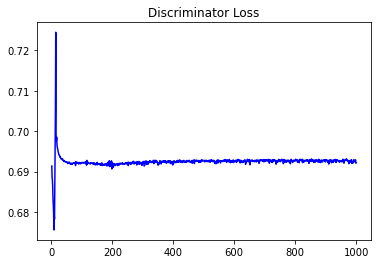

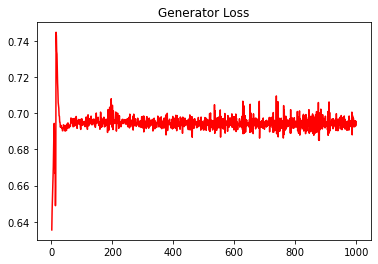

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.14725164312598288


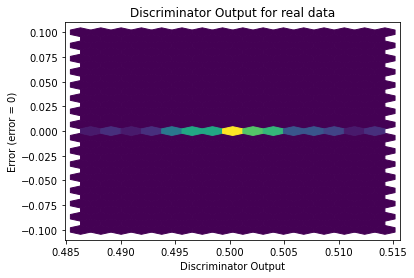

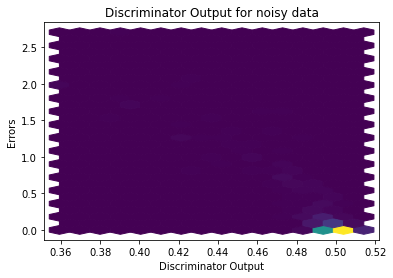

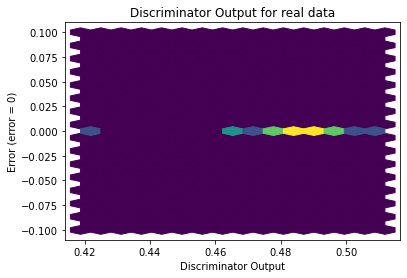

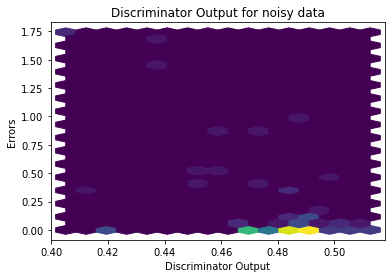

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


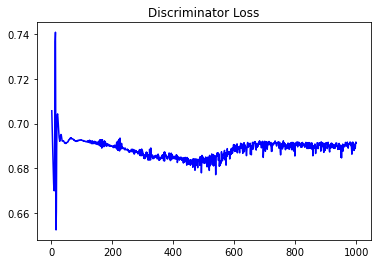

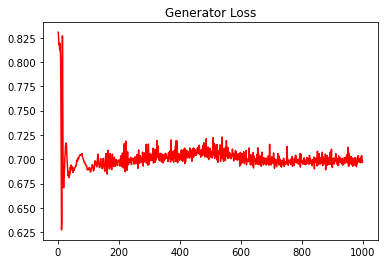

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.21030815601929112


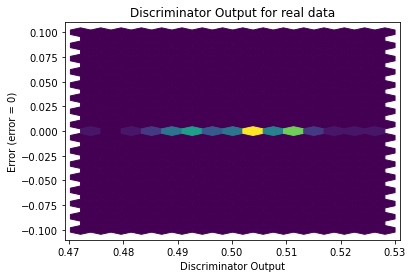

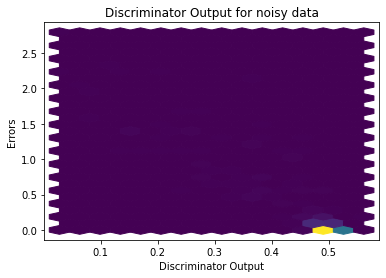

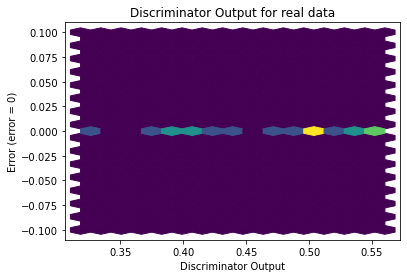

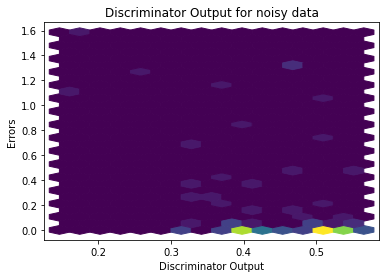

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1227]], requires_grad=True)
